<a href="https://colab.research.google.com/github/koreanddinghwan/OPENAI_TEST/blob/main/DiabetesTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))



Found GPU at: /device:GPU:0


In [23]:
# Load the dataset
diab = pd.read_csv("./diabetes_prediction_dataset.csv")

# Convert categorical variables to one-hot encoding
diab = pd.get_dummies(diab, columns=['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes'])

# Normalize numeric variables between 0 and 1
diab['age'] = (diab['age'] - diab['age'].min()) / (diab['age'].max() - diab['age'].min())
diab['bmi'] = (diab['bmi'] - diab['bmi'].min()) / (diab['bmi'].max() - diab['bmi'].min())
diab['HbA1c_level'] = (diab['HbA1c_level'] - diab['HbA1c_level'].min()) / (diab['HbA1c_level'].max() - diab['HbA1c_level'].min())
diab['blood_glucose_level'] = (diab['blood_glucose_level'] - diab['blood_glucose_level'].min()) / (diab['blood_glucose_level'].max() - diab['blood_glucose_level'].min())

# Split the dataset into training and validation sets
train_data, validation_data = train_test_split(diab, test_size=0.3, random_state=99)

# Define the input shape
input_shape = train_data.shape[1] - 2

# Convert the data to NumPy arrays
train_X = train_data.iloc[:, :-2].values
train_y = train_data.iloc[:, -2:].values
validation_X = validation_data.iloc[:, :-2].values
validation_y = validation_data.iloc[:, -2:].values

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(32, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the validation set
_, accuracy = model.evaluate(validation_X, validation_y, verbose=0)
print('Validation accuracy:', accuracy)


Epoch 1/100
2188/2188 [==============================] - 13s 4ms/step - loss: 0.1368 - accuracy: 0.9536
Epoch 2/100
2188/2188 [==============================] - 10s 4ms/step - loss: 0.1179 - accuracy: 0.9587
Epoch 3/100
2188/2188 [==============================] - 10s 5ms/step - loss: 0.1144 - accuracy: 0.9601
Epoch 4/100
2188/2188 [==============================] - 10s 4ms/step - loss: 0.1044 - accuracy: 0.9641
Epoch 5/100
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0990 - accuracy: 0.9655
Epoch 6/100
2188/2188 [==============================] - 10s 4ms/step - loss: 0.0967 - accuracy: 0.9667
Epoch 7/100
2188/2188 [==============================] - 10s 5ms/step - loss: 0.0938 - accuracy: 0.9671
Epoch 8/100
2188/2188 [==============================] - 10s 5ms/step - loss: 0.0920 - accuracy: 0.9680
Epoch 9/100
2188/2188 [==============================] - 10s 5ms/step - loss: 0.0916 - accuracy: 0.9682
Epoch 10/100
2188/2188 [==============================] - 10s 5ms

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, cohen_kappa_score


valid_pred = model.predict(validation_X)
valid_pred_class = np.argmax(valid_pred, axis=1)

# 실제 레이블과 예측 레이블 간의 confusion matrix 계산
confusion_mtx = confusion_matrix(np.argmax(validation_y, axis=1), valid_pred_class)
print("Confusion Matrix:")
print(confusion_mtx)


# 모델 학습 코드...

# 검증 세트 예측
valid_pred = model.predict(validation_X)
valid_pred_class = np.argmax(valid_pred, axis=1)

# 실제 레이블과 예측 레이블 간의 confusion matrix 계산
confusion_mtx = confusion_matrix(np.argmax(validation_y, axis=1), valid_pred_class)

# Positive class에 대한 accuracy, p-value, kappa, sensitivity, specificity 계산
true_positive = confusion_mtx[1, 1]
false_positive = confusion_mtx[0, 1]
false_negative = confusion_mtx[1, 0]
true_negative = confusion_mtx[0, 0]

accuracy = (true_positive + true_negative) / np.sum(confusion_mtx)
p_value = true_positive / (true_positive + false_positive)
kappa = cohen_kappa_score(np.argmax(validation_y, axis=1), valid_pred_class)
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Accuracy: {:.4f}".format(accuracy))
print("P-value: {:.4f}".format(p_value))
print("Kappa: {:.4f}".format(kappa))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))

938/938 [==============================] - 2s 2ms/step
Confusion Matrix:
[[27435    48]
 [  804  1713]]
938/938 [==============================] - 2s 2ms/step
Accuracy: 0.9716
P-value: 0.9727
Kappa: 0.7861
Sensitivity: 0.6806
Specificity: 0.9983


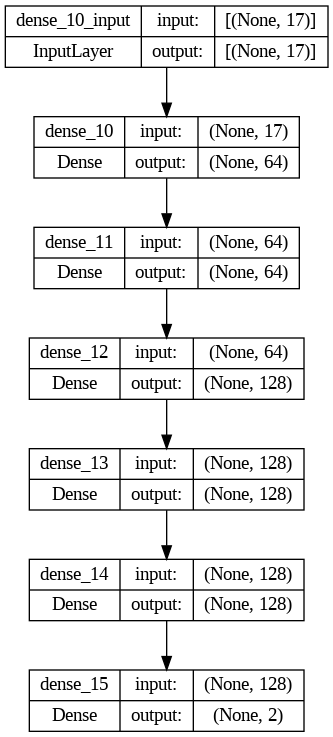

In [22]:
from tensorflow.keras.utils import plot_model


# 모델 시각화
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
